## Iris 종류 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1. Data

### 1.1 Data Load

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

- 암술과 수술의 길이와 넓이.
    - sepal length (cm)
    - sepal width (cm)
    - petal length (cm)
    - petal width (cm)

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 정답은 iris 꽃의 종류.

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data, target = iris['data'], iris['target']

### 1.2 데이터 EDA

In [6]:
pd.DataFrame(data, columns=iris['feature_names']).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.3 Data Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target
)

In [8]:
print('train data 개수:', len(train_data))
print('train data 개수:', len(test_data))

train data 개수: 105
train data 개수: 45


### 1.4 시각화

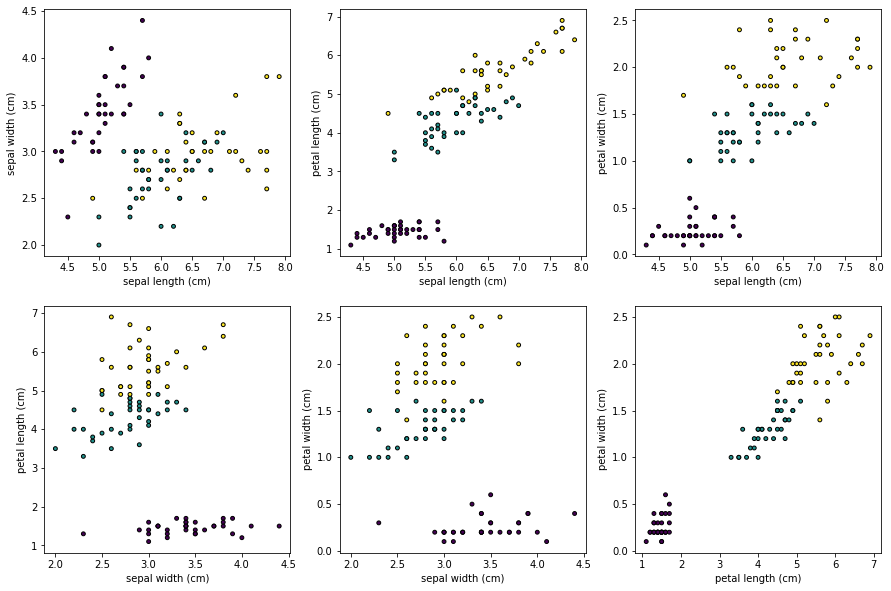

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 네 개 변수의 모든 조합.
pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    ax = axes[idx//3, idx%3]
    ax.scatter(
        x=train_data[:, x], y=train_data[:, y], c=train_target, edgecolor='black', s=15
    )
    ax.set_xlabel(iris['feature_names'][x])
    ax.set_ylabel(iris['feature_names'][y])

### 2. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()

### 2.1 학습

In [11]:
gini_tree.fit(train_data, train_target)

DecisionTreeClassifier()

[Text(223.2, 475.65000000000003, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(111.6, 339.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 339.75, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(223.2, 203.85000000000002, 'petal length (cm) <= 5.35\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(111.6, 67.94999999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(334.79999999999995, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(446.4, 203.85000000000002, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

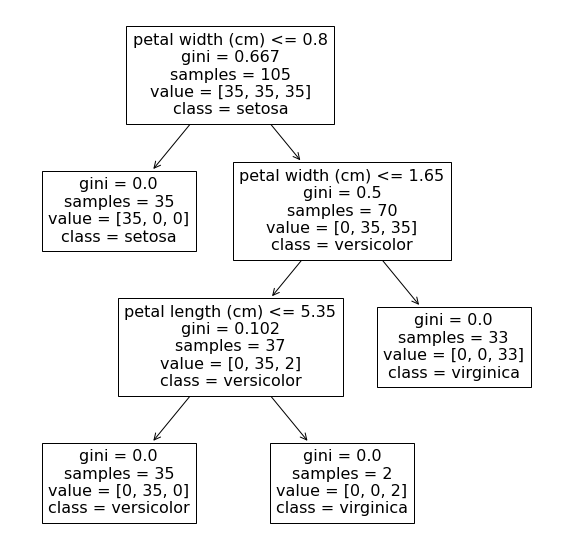

In [12]:
plt.figure(figsize=(10, 10))
plot_tree(gini_tree, feature_names=iris['feature_names'], class_names=iris['target_names'])

### 2.2 Arguments

- DecisionTreeClassifier에서 주로 탐색하는 argument들.
    - criterion
        - 어떤 정보 이득을 기준으로 데이터를 나눌지 정함.
        - 'gini', 'entropy'
    - max_depth
        - 나무의 최대 깊이를 정함.
    - min_samples_split
        - 노드가 나눠질 수 있는 최소 데이터 개수.

### 2.2.1 max_depth

[Text(167.4, 163.07999999999998, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor')]

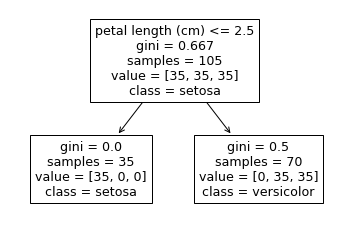

In [14]:
depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(train_data, train_target)

plot_tree(depth_1_tree, feature_names=iris['feature_names'], class_names=iris['target_names'])

### 2.2.2 min_samples_split

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

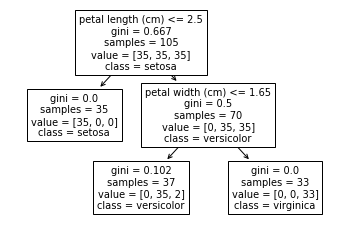

In [16]:
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)

plot_tree(sample_50_tree, feature_names=iris['feature_names'], class_names=iris['target_names'])

### 2.2.3 criterion

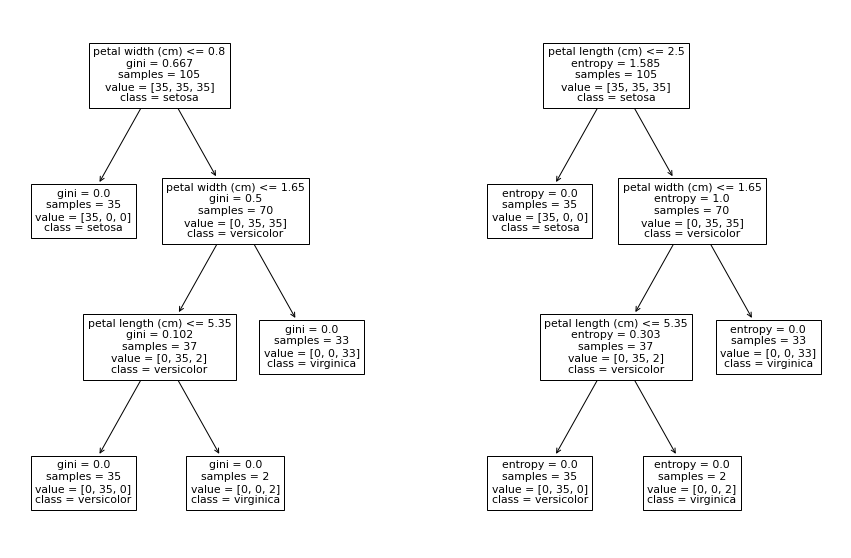

In [17]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_tree(gini_tree, feature_names=iris['feature_names'], class_names=iris['target_names'], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris['feature_names'], class_names=iris['target_names'], ax=axes[1])
plt.show()

### 2.3.1 예측

In [18]:
trees = [
    ('gini tree', gini_tree),
    ('entropy tree', entropy_tree),
    ('depth=1 tree', depth_1_tree),
    ('sample=50 tree', sample_50_tree),
]

In [19]:
train_preds = []
test_preds = []
for tree_name, tree in trees:
    train_pred = tree.predict(train_data)
    test_pred = tree.predict(test_data)
    train_preds += [train_pred]
    test_preds += [test_pred]

In [23]:
train_preds
# 각각 gini tree, ... , sample=50 tree의 예측값

[array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

### 2.3.2 평가하기

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
for idx, (tree_name, tree) in enumerate(trees):
    train_acc = accuracy_score(train_target, train_preds[idx])
    test_acc = accuracy_score(test_target, test_preds[idx])
    print(tree_name)
    print('\t', f'train accuracy is {train_acc:.2f}')
    print('\t', f'test accuracy is {test_acc:.2f}')

gini tree
	 train accuracy is 1.00
	 test accuracy is 0.91
entropy tree
	 train accuracy is 1.00
	 test accuracy is 0.91
depth=1 tree
	 train accuracy is 0.67
	 test accuracy is 0.67
sample=50 tree
	 train accuracy is 0.98
	 test accuracy is 0.91


### 2.4 Feature Importance

In [30]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
gini_tree.feature_importances_

array([0.        , 0.        , 0.05405405, 0.94594595])

각각 sepal length, sepal width, petal length, petal width의 중요도.

In [25]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris['feature_names'])

In [31]:
gini_feature_importance

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.054054
petal width (cm)     0.945946
dtype: float64

<AxesSubplot:title={'center':'gini tree feature importance'}>

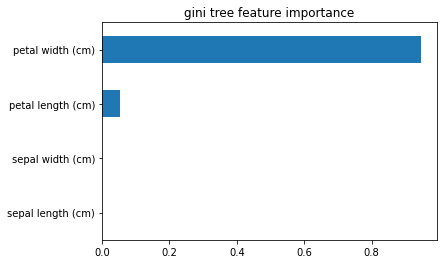

In [26]:
gini_feature_importance.plot(kind='barh', title='gini tree feature importance')

petal width가 가장 불순도를 감소시킴.

In [27]:
sample_50_feature_importance = pd.Series(
    sample_50_tree.feature_importances_,
    index=iris['feature_names']
)

<AxesSubplot:title={'center':'sample=50 tree feature importance'}>

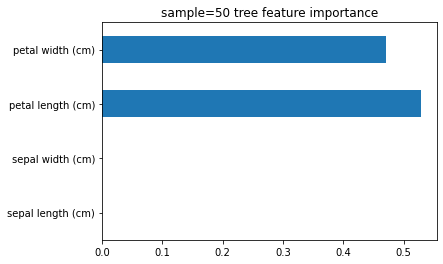

In [29]:
sample_50_feature_importance.plot(kind='barh', title='sample=50 tree feature importance')

petal length가 가장 불순도를 감소시킴.

## 3. 시각화

In [36]:
def plot_decision_boundary(pair_data, pair_tree, ax):
    x_min, x_max = pair_data[:, 0].min() - 1, pair_data[:, 0].max() + 1
    y_min, y_max = pair_data[:, 1].min() - 1, pair_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, y_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    # Plot the training points
    for i, color in zip(range(3), 'ryb'):
        idx = np.where(train_target == i)
        ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris['target_names'][i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    return ax

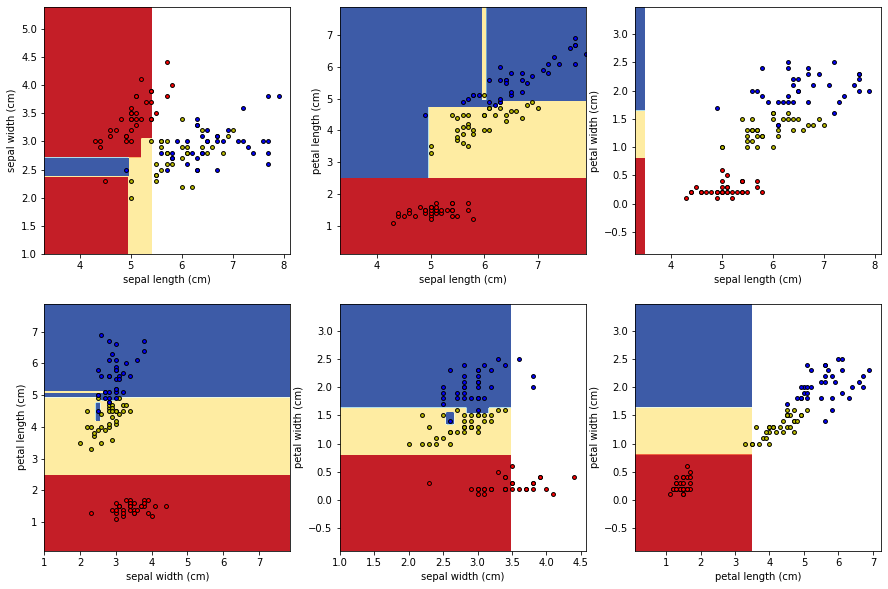

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    pair_data = train_data[:, pair]
    pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)
    
    ax = axes[idx//3, idx%3]
    ax = plot_decision_boundary(pair_data, pair_tree, ax)
    ax.set_xlabel(iris['feature_names'][x])
    ax.set_ylabel(iris['feature_names'][y])